<a href="https://colab.research.google.com/github/sergio-cabrales/python/blob/main/PricebyVolume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from scipy import stats, signal
import plotly.express as px
import plotly.graph_objects as go

import pandas_datareader as web
import datetime
import matplotlib.pyplot as plt

In [199]:
# Get the stock quote
df = web.DataReader('EC', data_source='yahoo',start='2016-03-01', end='2021-03-12')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-01,7.32,6.980,7.01,7.28,2538100.0,5.756054
2016-03-02,7.88,7.210,7.25,7.84,2063300.0,6.198828
2016-03-03,8.33,7.770,7.83,8.28,1795000.0,6.546721
2016-03-04,8.82,8.320,8.37,8.72,3226000.0,6.894615
2016-03-07,9.26,8.400,8.65,9.22,3295100.0,7.289948
...,...,...,...,...,...,...
2021-03-08,13.39,12.950,13.36,13.03,1235900.0,13.030000
2021-03-09,13.16,12.830,13.03,12.97,1245400.0,12.970000
2021-03-10,13.44,12.950,13.08,13.37,998800.0,13.370000


In [201]:
df.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)
start_price = df['Adj_Close'].min()
stop_price = df['Adj_Close'].max()

low = start_price
# delta means granularity in volume aggregation range, it is delta in price
# the volume corresponds to price
delta = (stop_price - start_price)/50    # here we are splitting whole price range into blocks
high = 0

idx_array = []
vol_array = []
low_array = []

while high < stop_price:
    volume = 0    
    high = low + delta
    
    sub_df = df.loc[df['Adj_Close'].between(low, high, inclusive=False)]
    low_array.append(low)

    for i in sub_df.index.values:
        volume = volume + df['Volume'][i]
            
    vol_array.append(volume)
    low = high
   
for idx, var in enumerate(vol_array):
    #print("{}: {}".format(idx, var))
    idx_array.append(idx)

In [202]:
P95 = np.percentile(low_array, 95)
print(P95)
P50 = np.percentile(low_array, 50)
print(P50)
P05 = np.percentile(low_array, 5)
print(P05)

21.748858500003845
14.173319716453568
6.59778093290329


<Figure size 2400x2400 with 0 Axes>

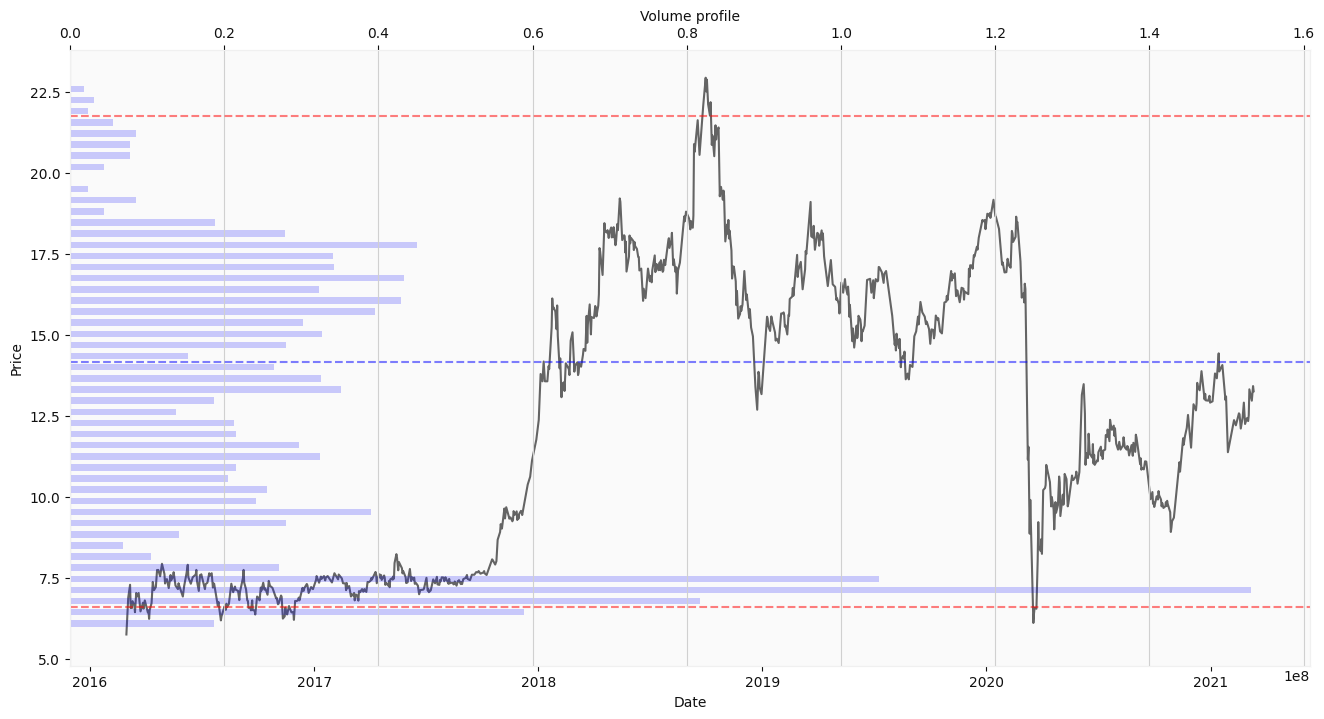

In [203]:
#price and corresponding partial volume profile
plt.figure(figsize=(20, 20), dpi= 120, facecolor='w', edgecolor='k')

#plt.subplot(321)
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(df.index, df['Adj_Close'], alpha=0.6, color='black')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Price')

ax.twiny()
h = int(df['Adj_Close'].max()/100) + 0.2
plt.barh(low_array, vol_array, alpha = 0.2, color='blue', height=h)
plt.axhline(P95, linestyle='--', alpha = 0.5, color = 'red', label='P95')
plt.axhline(P50, linestyle='--', alpha = 0.5, color = 'blue', label='P50')
plt.axhline(P05, linestyle='--', alpha = 0.5, color = 'red', label='P5')
plt.xlabel('Volume profile')
plt.ylabel('Price')

plt.show()

Text(0, 0.5, 'Price')

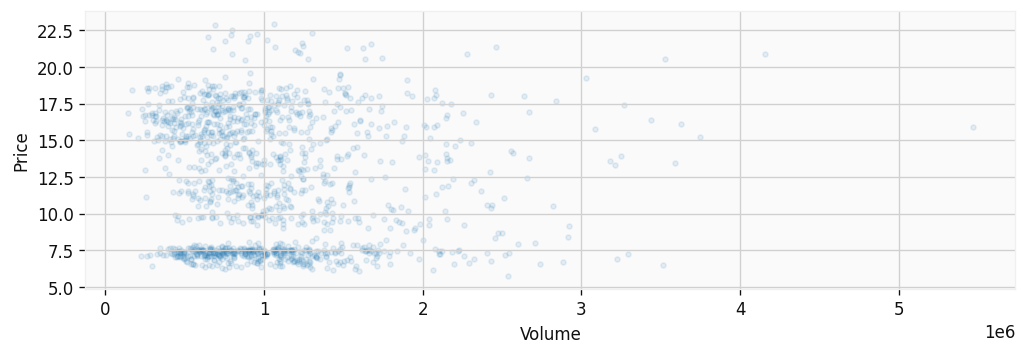

In [204]:
df.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)
plt.figure(figsize=(10, 3), dpi= 120, facecolor='w', edgecolor='k')
plt.scatter(df.Volume, df.Adj_Close, alpha=0.1, marker='.')
plt.xlabel('Volume')
plt.ylabel('Price')